In [ ]:

!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 8.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=dbca985b44f22a812184b065c7094adbc0092eed893e07148f0d35706b8bd2b0
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as sk
from skfuzzy import control as ctrl

In [ ]:
luzAmbiental = ctrl.Antecedent(np.arange(0,800,10), 'ambiente')
potenciometro = ctrl.Antecedent(np.arange(0,4,0.1), 'potenciometro')
Watts = ctrl.Consequent(np.arange(0, 100, 1), 'lampara')

In [ ]:
luzAmbiental['Muy Soleado'] = sk.trapmf(luzAmbiental.universe, [640, 720, 800, 800])
luzAmbiental['Soleado'] = sk.trimf(luzAmbiental.universe, [480, 600, 720])
luzAmbiental['Nublado'] = sk.trimf(luzAmbiental.universe, [240, 400, 560])
luzAmbiental['Oscuro'] = sk.trimf(luzAmbiental.universe, [80, 200, 320])
luzAmbiental['Muy Oscuro'] = sk.trapmf(luzAmbiental.universe, [0, 0, 80, 160])

In [ ]:
potenciometro['Alto'] = sk.trapmf(potenciometro.universe,       [ 3.0, 3.5, 4, 4])
potenciometro['Medio Alto'] = sk.trimf(potenciometro.universe,  [ 2.25, 2.875, 3.5])
potenciometro['Medio'] = sk.trimf(potenciometro.universe,       [ 1.5, 2.0, 2.5])
potenciometro['Medio bajo'] = sk.trimf(potenciometro.universe,  [ 0.5, 1.125, 1.75])
potenciometro['Bajo'] = sk.trapmf(potenciometro.universe,       [ 0, 0, .5, 1.0])

In [ ]:
Watts['wAlto'] = sk.trapmf(Watts.universe,       [ 80, 90, 100, 100])
Watts['wMedio Alto'] = sk.trimf(Watts.universe,  [ 60, 75, 90])
Watts['wMedio'] = sk.trimf(Watts.universe,       [ 30, 50, 70])
Watts['wMedio bajo'] = sk.trimf(Watts.universe,  [ 10, 25, 40])
Watts['wBajo'] = sk.trapmf(Watts.universe,       [ 0,   0,  10, 20])

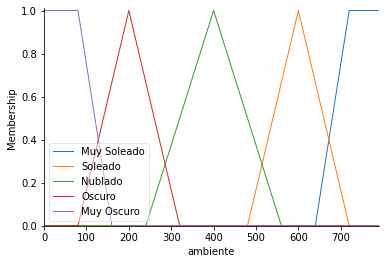

In [ ]:
luzAmbiental.view()




```
# Esto tiene formato de código
```



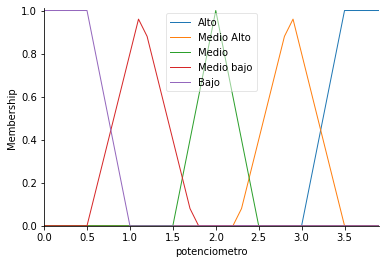

In [ ]:
  potenciometro.view()

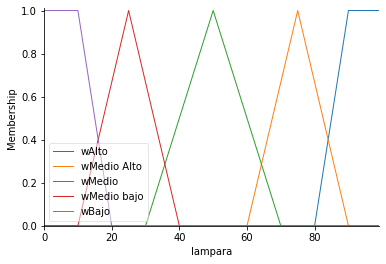

In [ ]:
Watts.view()

In [ ]:
rule1 = ctrl.Rule(luzAmbiental['Muy Soleado'] & potenciometro['Alto'], Watts['wBajo'])
rule2 = ctrl.Rule(luzAmbiental['Muy Soleado'] & potenciometro['Medio Alto'], Watts['wBajo'])
rule3 = ctrl.Rule(luzAmbiental['Muy Soleado'] & potenciometro['Medio'], Watts['wBajo'])
rule4 = ctrl.Rule(luzAmbiental['Muy Soleado'] & potenciometro['Medio bajo'], Watts['wBajo'])
rule5 = ctrl.Rule(luzAmbiental['Muy Soleado'] & potenciometro['Bajo'], Watts['wBajo'])
rule6 = ctrl.Rule(luzAmbiental['Soleado'] & potenciometro['Alto'], Watts['wMedio bajo'])
rule7 = ctrl.Rule(luzAmbiental['Soleado'] & potenciometro['Medio Alto'], Watts['wBajo'])
rule8 = ctrl.Rule(luzAmbiental['Soleado'] & potenciometro['Medio'], Watts['wBajo'])
rule9 = ctrl.Rule(luzAmbiental['Soleado'] & potenciometro['Medio bajo'], Watts['wBajo'])
rule10 = ctrl.Rule(luzAmbiental['Soleado'] & potenciometro['Bajo'], Watts['wBajo'])
rule11 = ctrl.Rule(luzAmbiental['Nublado'] & potenciometro['Alto'], Watts['wMedio'])
rule12 = ctrl.Rule(luzAmbiental['Nublado'] & potenciometro['Medio Alto'], Watts['wMedio'])
rule13 = ctrl.Rule(luzAmbiental['Nublado'] & potenciometro['Medio'], Watts['wMedio bajo'])
rule14 = ctrl.Rule(luzAmbiental['Nublado'] & potenciometro['Medio bajo'], Watts['wBajo'])
rule15 = ctrl.Rule(luzAmbiental['Nublado'] & potenciometro['Bajo'], Watts['wBajo'])
rule16 = ctrl.Rule(luzAmbiental['Oscuro'] & potenciometro['Alto'], Watts['wMedio Alto'])
rule17 = ctrl.Rule(luzAmbiental['Oscuro'] & potenciometro['Medio Alto'], Watts['wMedio Alto'])
rule18 = ctrl.Rule(luzAmbiental['Oscuro'] & potenciometro['Medio'], Watts['wMedio'])
rule19 = ctrl.Rule(luzAmbiental['Oscuro'] & potenciometro['Medio bajo'], Watts['wMedio bajo'])
rule20 = ctrl.Rule(luzAmbiental['Oscuro'] & potenciometro['Bajo'], Watts['wBajo'])
rule21 = ctrl.Rule(luzAmbiental['Muy Oscuro'] & potenciometro['Alto'], Watts['wAlto'])
rule22 = ctrl.Rule(luzAmbiental['Muy Oscuro'] & potenciometro['Medio Alto'], Watts['wMedio Alto'])
rule23 = ctrl.Rule(luzAmbiental['Muy Oscuro'] & potenciometro['Medio'], Watts['wMedio'])
rule24 = ctrl.Rule(luzAmbiental['Muy Oscuro'] & potenciometro['Medio bajo'], Watts['wMedio bajo'])
rule25 = ctrl.Rule(luzAmbiental['Muy Oscuro'] & potenciometro['Bajo'], Watts['wBajo'])

In [ ]:
luminancia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15 , rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

In [ ]:
luminancia=ctrl.ControlSystemSimulation(luminancia_ctrl)

Salida:  91.70238095238096


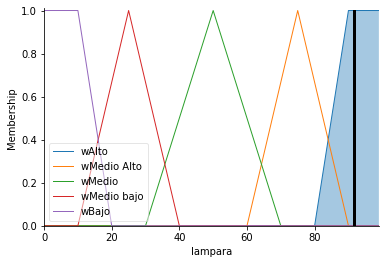

In [ ]:
luminancia.input['ambiente'] = 0
luminancia.input['potenciometro'] = 4
luminancia.compute()
Watts.view(sim=luminancia)
print("Salida: ",luminancia.output["lampara"])

Salida:  8.269230769230768


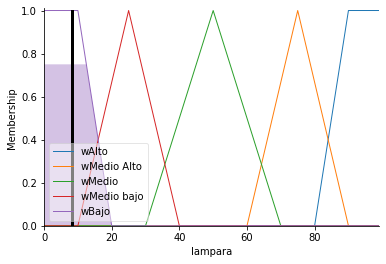

In [ ]:
luminancia.input['ambiente'] = 700
luminancia.input['potenciometro'] = 0
luminancia.compute()
Watts.view(sim=luminancia)
print("Salida: ",luminancia.output["lampara"])

Salida:  9.094827586206897


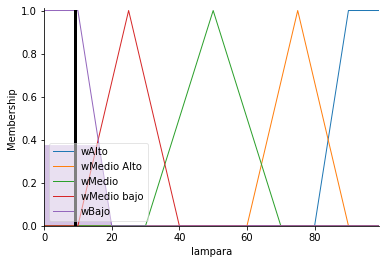

In [ ]:
luminancia.input['ambiente'] = 500
luminancia.input['potenciometro'] = 1
luminancia.compute()
Watts.view(sim=luminancia)
print("Salida: ",luminancia.output["lampara"])

Salida:  64.82123578826628


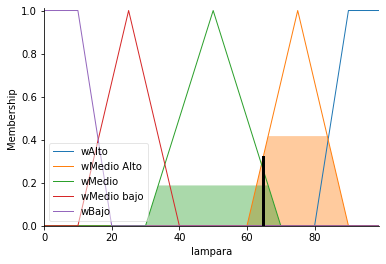

In [ ]:
luminancia.input['ambiente'] = 270
luminancia.input['potenciometro'] = 4
luminancia.compute()
Watts.view(sim=luminancia)
print("Salida: ",luminancia.output["lampara"])